# Customer Segmentation for Targeted Marketing Optimization

## Business Objective
The goal of this project is to segment customers based on demographic and purchasing behavior to enable targeted marketing, improve retention, and optimize revenue allocation.

## Key Questions
- Who are the highest-value customers?
- Which segments generate most revenue?
- Which customers are at risk?

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [125]:
df=pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [126]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [127]:
df.shape

(2240, 29)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [129]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [130]:
df.dropna(inplace=True)

In [131]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [132]:
upper_limit = df["Income"].quantile(0.99)
df["Income"] = np.where(df["Income"] > upper_limit, upper_limit, df["Income"])

df["Income"].max()

np.float64(94458.79999999999)

In [133]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [134]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [135]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [136]:
df["Age"]=2025-df["Year_Birth"]

In [137]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [138]:
df["total_children"]=df["Kidhome"]+df["Teenhome"]
df["total_children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: total_children, Length: 2216, dtype: int64

In [139]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children'],
      dtype='object')

In [140]:
spend_cols=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [141]:
df["total_spending"]=df[spend_cols].sum(axis=1)
df["total_spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_spending, Length: 2216, dtype: int64

In [142]:
df["customer_since"]=(pd.Timestamp("today")-df["Dt_Customer"]).dt.days

In [143]:
df["customer_since"]

0       4924
1       4374
2       4573
3       4400
4       4422
        ... 
2235    4642
2236    4280
2237    4416
2238    4417
2239    4883
Name: customer_since, Length: 2216, dtype: int64

## Exploratory Data Analysis

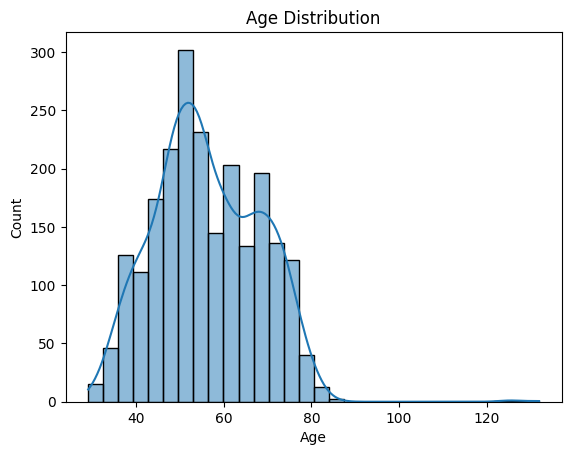

In [144]:
sns.histplot(df["Age"], bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

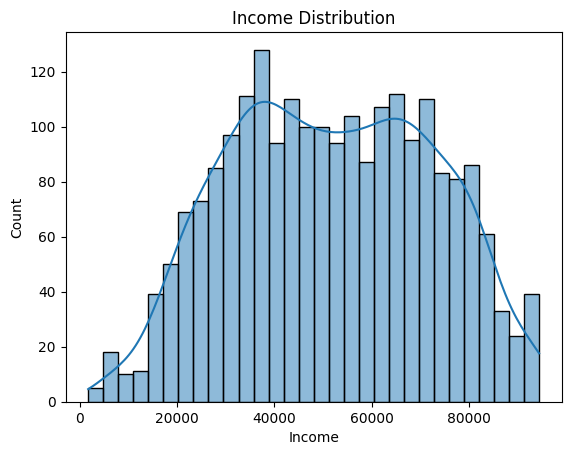

In [145]:
sns.histplot(df["Income"], bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

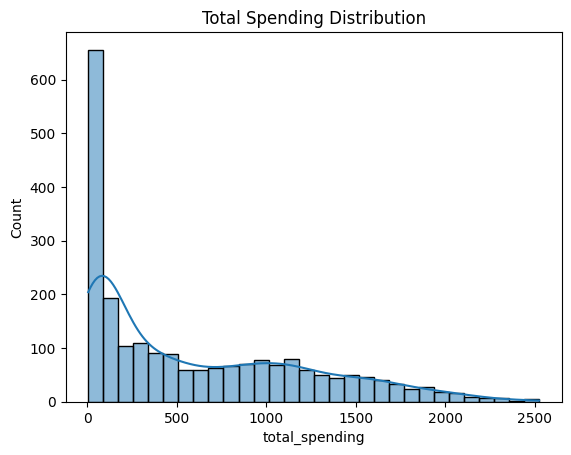

In [146]:
sns.histplot(df["total_spending"], bins=30,kde=True)
plt.title("Total Spending Distribution")
plt.show()

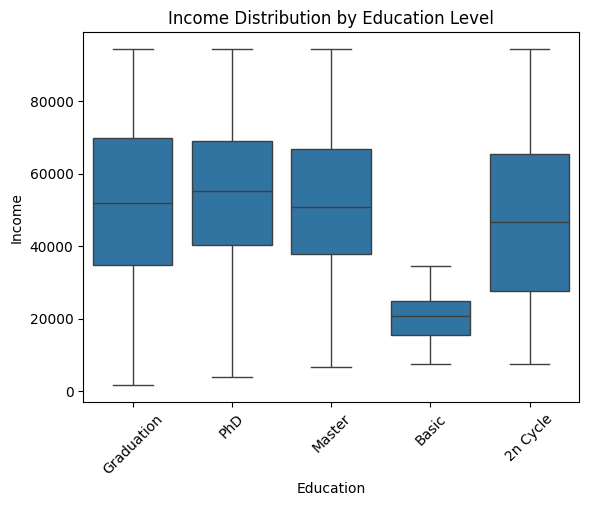

In [147]:
sns.boxplot(x="Education", y="Income", data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

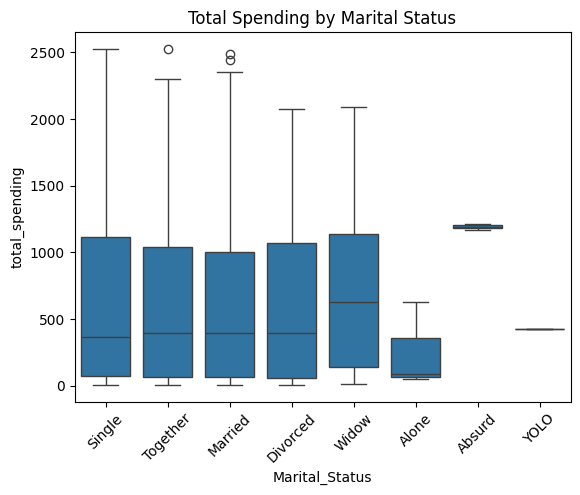

In [148]:
sns.boxplot(x="Marital_Status", y="total_spending", data=df)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")
plt.show()

In [149]:
corr=df[[
    "Income",
    "Age",
    "Recency",
    "total_spending",
    "NumWebPurchases",
    "NumStorePurchases"
]].corr()
corr

,Income,Age,Recency,total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.206893,0.006533,0.816931,0.484641,0.667450
Age,0.206893,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,0.006533,0.016295,1.000000,0.020066,-0.005641,-0.000434
total_spending,0.816931,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.484641,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.667450,0.127891,-0.000434,0.675181,0.516240,1.000000


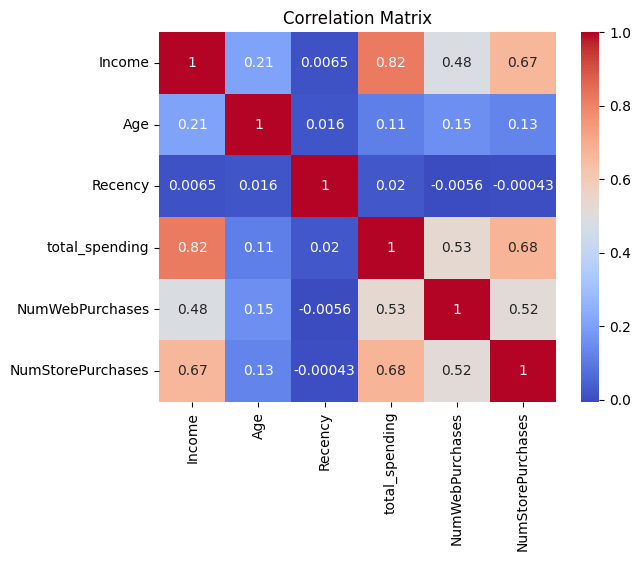

In [150]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [151]:
pivot_income=df.pivot_table(index="Education", columns="Marital_Status", values="Income", aggfunc="mean")
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46174.997500,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,53957.147899,50799.831702,51277.553659,53483.660351,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53415.408000,51488.674510,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,57127.474737,53106.433333,55389.358621,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

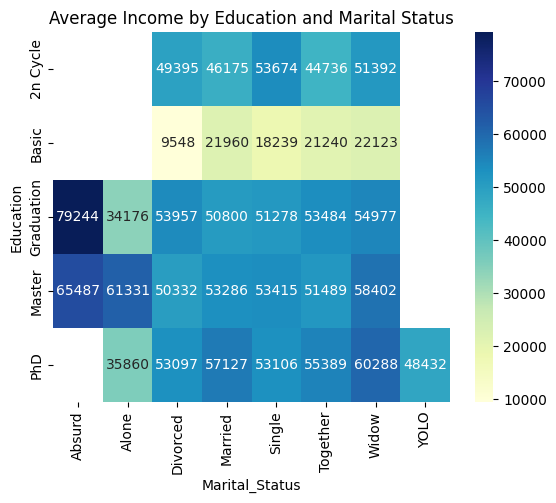

In [152]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status") 

In [153]:
group1=df.groupby("Education")["total_spending"].mean().sort_values(ascending=False)
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: total_spending, dtype: float64

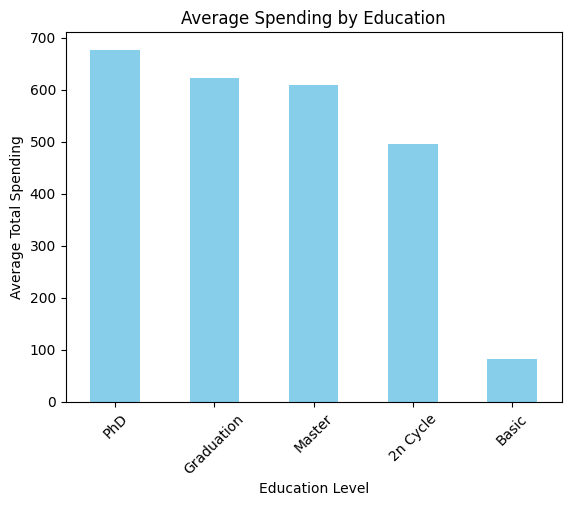

In [154]:
group1.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education")
plt.xlabel("Education Level")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)
plt.show()

In [155]:
df["AcceptedAny"]=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [156]:
df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x: 1 if x>0 else 0)

In [157]:
df["AcceptedAny"].unique()

array([1, 0])

In [158]:
group2=df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

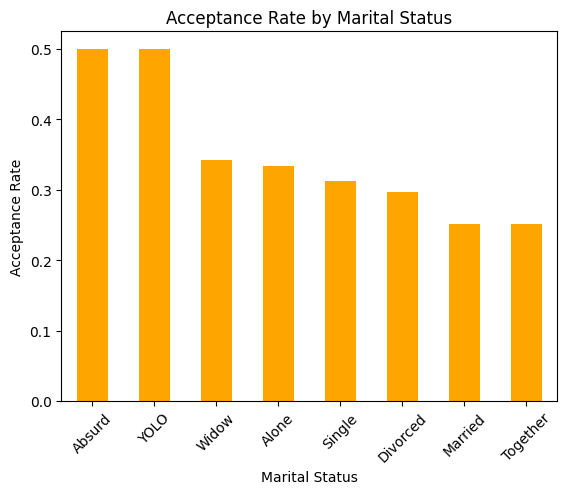

In [159]:
group2.plot(kind="bar", color="orange")
plt.title("Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45) 
plt.show()

In [160]:
bins=[18,30,40,50,60,70,90]

In [161]:
labels=["18-29","30-39","40-49","50-59","60-69","70+"]

In [162]:
df["age_group"]=pd.cut(df["Age"], bins=bins, labels=labels)

In [163]:
group3=df.groupby("age_group")["Income"].mean()

C:\Users\skt\AppData\Local\Temp\ipykernel_5568\359388110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3=df.groupby("age_group")["Income"].mean()


In [164]:
group3

age_group
18-29    46658.000000
30-39    46263.383962
40-49    47690.772514
50-59    50595.101644
60-69    56181.983442
70+      58682.579553
Name: Income, dtype: float64

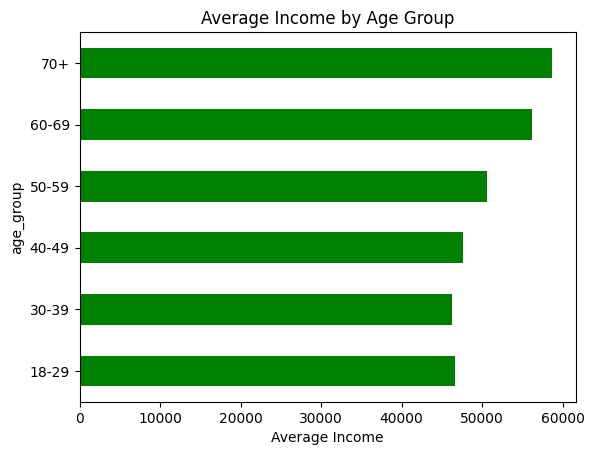

In [165]:
group3.plot(kind="barh", color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [166]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children', 'total_spending', 'customer_since',
       'AcceptedAny', 'age_group'],
      dtype='object')

In [167]:
features=[
    "Age",
    "Income",
    "total_spending",
    "NumWebPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Recency"
]

In [168]:
X=df[features].copy()


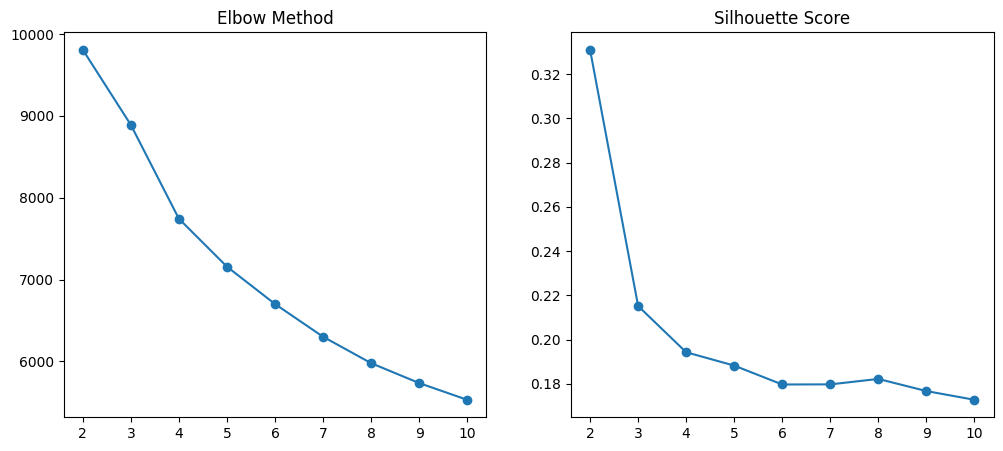

In [169]:
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("kmeans", KMeans(n_clusters=k, random_state=42))
    ])
    
    model.fit(X)
    
    scaled = model.named_steps["scaler"].transform(X)
    labels = model.named_steps["kmeans"].labels_
    
    inertia.append(model.named_steps["kmeans"].inertia_)
    sil_scores.append(silhouette_score(scaled, labels))

# Plot selection metrics
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")


plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score")


plt.show()

In [170]:
best_k = 4

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=best_k, random_state=42))
])

final_model.fit(X)

df["Cluster"] = final_model.predict(X)

scaled_final = final_model.named_steps["scaler"].transform(X)

final_sil = silhouette_score(scaled_final, df["Cluster"])

print("Final Silhouette Score:", round(final_sil, 3))

Final Silhouette Score: 0.194


In [171]:
df["Cluster"].value_counts()

Cluster
3    587
0    570
2    545
1    514
Name: count, dtype: int64

In [172]:
cluster_profile = (df.groupby("Cluster")[features].mean().round(2))
cluster_profile


,Age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,51.93,33738.43,111.18,2.18,3.25,6.62,25.26
1,60.05,60329.61,894.99,7.54,8.06,6.15,44.79
2,56.04,37247.12,136.00,2.43,3.50,6.29,75.09
3,57.05,75214.81,1273.87,4.44,8.44,2.42,51.56


In [173]:
# Assigning Names to Clusters
cluster_names = {
    0: "Price-Sensitive Occasional Buyers",
    1: "Premium Loyal Customers",
    2: "Low-Engagement Budget Customers",
    3: "Digital-First High-Value Shoppers"
}

df["Segment"] = df["Cluster"].map(cluster_names)

In [174]:
df["Segment"].value_counts()

Segment
Digital-First High-Value Shoppers    587
Price-Sensitive Occasional Buyers    570
Low-Engagement Budget Customers      545
Premium Loyal Customers              514
Name: count, dtype: int64

In [175]:
cluster_size = df["Cluster"].value_counts()
cluster_size

Cluster
3    587
0    570
2    545
1    514
Name: count, dtype: int64

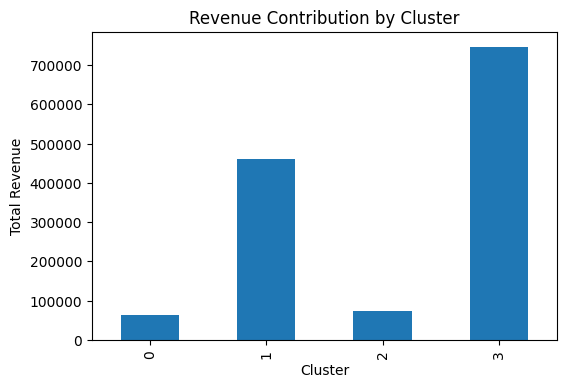

In [176]:
revenue_cluster = df.groupby("Cluster")["total_spending"].sum()

plt.figure(figsize=(6,4))
revenue_cluster.plot(kind="bar")
plt.title("Revenue Contribution by Cluster")
plt.ylabel("Total Revenue")
plt.show()

In [177]:
revenue_share = revenue_cluster / revenue_cluster.sum() * 100
revenue_share.round(2)

Cluster
0     4.71
1    34.20
2     5.51
3    55.58
Name: total_spending, dtype: float64

In [178]:
campaign_response = df.groupby("Cluster")["AcceptedAny"].mean().round(3)
campaign_response

Cluster
0    0.196
1    0.356
2    0.112
3    0.424
Name: AcceptedAny, dtype: float64

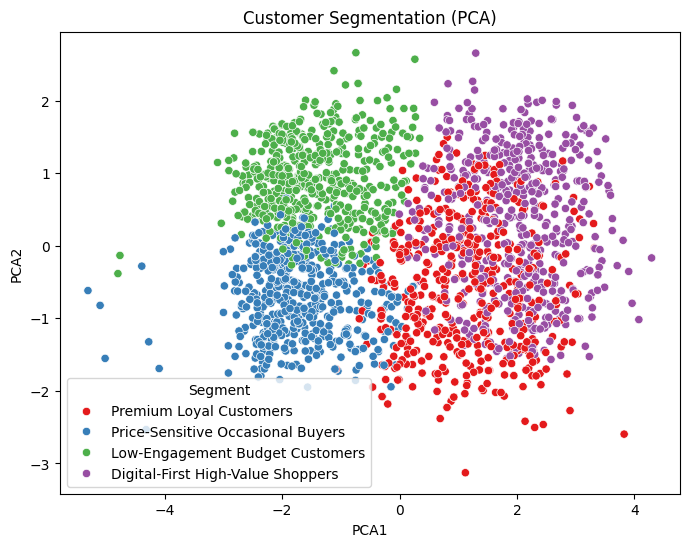

In [179]:
scaled = final_model.named_steps["scaler"].transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="Segment",
    palette="Set1"
)
plt.title("Customer Segmentation (PCA)")
plt.show()

In [180]:
import joblib

joblib.dump(final_model, "customer_segmentation_model.pkl")

['customer_segmentation_model.pkl']

# Executive Summary
- Identified 4 distinct customer segments using KMeans clustering.
- Achieved balanced clusters with moderate silhouette score (~0.19).
- High-income segment drives majority of revenue.
- Digital-heavy segment shows strong online purchasing behavior.
- Marketing strategies can be customized per segment to improve retention and ROI.

Future Improvements:
- Compare with Hierarchical clustering
- Test stability across different feature sets
- Deploy segmentation model via dashboard